In [211]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [212]:
# csv 파일을 가져옴
df = pd.read_csv("../data/2016-2017seseek2.csv", thousands=',', encoding='euc-kr')
df.head()

,지점,일시,평균기온(°C),최저기온(°C),일교차,습도,평균 오존전량(DU),최저기온,최소상대습도,환자수,습도위험지수,최저기온위험지수,일교차위험지수,오존위험지수,ALU
0,세종,2016-01-01,-5.7,-7.3,3.7,64.0,354.9,7.3,36.0,60,NaN,NaN,NaN,NaN,NaN
1,세종,2016-01-02,-5.0,-9.9,9.2,66.0,365.5,9.9,34.0,172,NaN,NaN,NaN,NaN,NaN
2,세종,2016-01-03,-3.7,-11.2,13.7,49.0,373.2,11.2,51.0,130,NaN,NaN,NaN,NaN,NaN
3,세종,2016-01-04,1.9,-2.3,12.1,49.0,339.8,2.3,51.0,47,NaN,NaN,NaN,NaN,NaN
4,세종,2016-01-05,3.6,-3.4,11.9,50.0,269.9,3.4,50.0,192,NaN,NaN,NaN,NaN,NaN


In [ ]:
#습도는 절대값으로 한다.
for i in df.index:
    if df.values[i,2] < 17 :
        if df.values[i,5] >70:
            df['습도위험지수'].values[i] = '1'
        elif 59< df.values[i,5] <70:
            df['습도위험지수'].values[i] = '2'
        elif 49< df.values[i,5] <60:
            df['습도위험지수'].values[i] = '3'
        else:
            df['습도위험지수'].values[i] = '4'
    elif 17<df.values[i,2] < 21:
        if df.values[i,5] >60:
            df['습도위험지수'].values[i] = '1'
        elif 49< df.values[i,5] <60:
            df['습도위험지수'].values[i] = '2'
        elif 39< df.values[i,5] <50:
            df['습도위험지수'].values[i] = '3'
        else:
            df['습도위험지수'].values[i] = '4'
            
    elif 20<df.values[i,2] < 24:
        if df.values[i,5] >50:
            df['습도위험지수'].values[i] = '1'
        elif 39< df.values[i,5] <50:
            df['습도위험지수'].values[i] = '2'
        elif 29< df.values[i,5] <40:
            df['습도위험지수'].values[i] = '3'
        else:
            df['습도위험지수'].values[i] = '4'
    elif df.values[i,2] > 23:
        if df.values[i,5] >40:
            df['습도위험지수'].values[i] = '1'
        elif 29< df.values[i,5] <40:
            df['습도위험지수'].values[i] = '2'
        elif 19< df.values[i,5] <30:
            df['습도위험지수'].values[i] = '3'
        else:
            df['습도위험지수'].values[i] = '4'
            
    if df.values[i,3] <-7.7 or 30<=df.values[1,3]: 
        df['최저기온위험지수'].values[i] = '4' 
    elif -7.7<=df.values[i,3] <-0.5:
        df['최저기온위험지수'].values[i] = '3' 
    elif -0.5<=df.values[i,3] < 12.6:
        df['최저기온위험지수'].values[i] = '2'  
    elif 12.6<=df.values[i,3] <30:
        df['최저기온위험지수'].values[i] = '1'  
        
    if df.values[i,4] < 8.6 : 
        df['일교차위험지수'].values[i] = '1' 
    elif 8.6<= df.values[i,4] < 12.3: 
        df['일교차위험지수'].values[i] = '2'  
    elif 12.3<=df.values[i,4] < 15.8:  
        df['일교차위험지수'].values[i] = '3'  
    elif 15.8<= df.values[i,4] : 
        df['일교차위험지수'].values[i] = '4' 
        
    if df.values[i,6] < 300:
        df['오존위험지수'].values[i] = '1'
    elif 300<=df.values[i,6] <348.7:
        df['오존위험지수'].values[i] = '2'
    elif 348.7<=df.values[i,6] <386.4:
        df['오존위험지수'].values[i] = '3'
    elif 386.4<= df.values[i,6]:
        df['오존위험지수'].values[i] = '4'  

In [ ]:
df.head()

In [ ]:
temr =df['일교차'].corr(df['환자수'])
hum = df['습도'].corr(df['환자수'])
oj = df['평균 오존전량(DU)'].corr(df['환자수'])
mtem = df['최저기온(°C)'].corr(df['환자수'])
al = temr+hum+(-oj)+mtem
temr,hum,-oj,mtem

In [203]:
temr = temr/al
hum = hum/al
oj = -oj/al
mtem = mtem/al

temr, hum, oj, mtem

(-0.4411673723032937,
 -0.5714683257156993,
 -1.2015347629129742,
 3.214170460931967)

In [204]:
al = temr+hum+oj+mtem

In [205]:
#세종 최저 0.59, 오존 0.22, 습도 0.11, 일교차 0.08
#습도 최저 일교차 오존
for i in df.index:
    df['ALU'].values[i] = 0.11*df.values[i,10]+0.59*df.values[i,11]+0.08*df.values[i,12]+0.22*df.values[i,13]
    
df.head()

,지점,일시,평균기온(°C),최저기온(°C),일교차,습도,평균 오존전량(DU),최저기온,최소상대습도,환자수,습도위험지수,최저기온위험지수,일교차위험지수,오존위험지수,ALU
0,세종,2016-01-01,-5.7,-7.3,3.7,64.0,354.9,7.3,36.0,60,2.0,3.0,1.0,3.0,2.73
1,세종,2016-01-02,-5.0,-9.9,9.2,66.0,365.5,9.9,34.0,172,2.0,4.0,2.0,3.0,3.40
2,세종,2016-01-03,-3.7,-11.2,13.7,49.0,373.2,11.2,51.0,130,4.0,4.0,3.0,3.0,3.70
3,세종,2016-01-04,1.9,-2.3,12.1,49.0,339.8,2.3,51.0,47,4.0,3.0,2.0,2.0,2.81
4,세종,2016-01-05,3.6,-3.4,11.9,50.0,269.9,3.4,50.0,192,3.0,3.0,2.0,1.0,2.48


In [210]:
df.to_csv("../data/sejongalldata.csv", encoding='utf-8', sep=',') 

PermissionError: [Errno 13] Permission denied: '../data/sejongalldata.csv'

In [ ]:
la = pd.read_csv("../data/2016-2017last.csv", thousands=',', encoding='euc-kr') 
la.head() 

In [ ]:
for i in df.index:
    if df.values[i,14] >= 3.0525:
        la['ALU지수값'].values[i] = '4'
    elif 2.6452<=df.values[i,14] < 3.0525:
        la['ALU지수값'].values[i] = '3'
    elif 1.5354<=df.values[i,14] <2.6452:
        la['ALU지수값'].values[i] = '2'
    elif 1<= df.values[i,14]<1.5354:
        la['ALU지수값'].values[i] = '1'  
la.head()

In [207]:
df['환자'] = df['환자수']/125

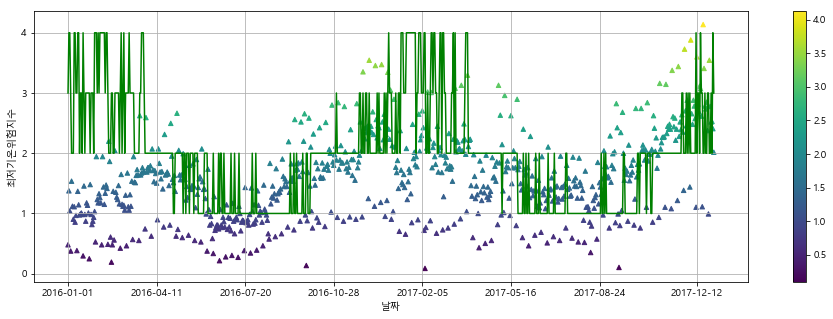

In [209]:
colormap=df['환자'] 
plt.figure(figsize=(16,5)) 
plt.plot(la['일시'],la['ALU지수값'], color = 'green') 
plt.scatter(df['일시'],df['환자'],s=20,c=colormap,marker='^') 
plt.xticks([0, 100, 200, 300, 400, 500, 600, 710]) 
plt.xlabel('날짜') 
plt.ylabel('최저기온위험지수') 
plt.colorbar() 
plt.grid() 
plt.show() 